In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score


In [2]:
card_activity = pd.read_csv('creditcard.csv')
card_activity.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
card_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
X =card_activity.drop(columns=['Time', 'Class'])
y= card_activity['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [5]:
print(X.shape, y.shape)

(284807, 29) (284807,)


In [6]:
card_activity['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
#separate 'training' and 'testing' data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
unique_ytrain, counts_ytrain = np.unique(y_train, return_counts=True)
print(unique_ytrain,counts_ytrain)

[0 1] [213224    381]


In [9]:
unique_ytest, counts_ytest = np.unique(y_test, return_counts=True)
print(unique_ytest,counts_ytest)

[0 1] [71091   111]


In [10]:
print('percentage of positive values in the training sample:', counts_ytrain[1]*100/(counts_ytrain[1]+counts_ytrain[0]))
print('percentage of positive values in the test sample:', counts_ytest[1]*100/(counts_ytest[1]+counts_ytest[0]))

percentage of positive values in the training sample: 0.17836661126846282
percentage of positive values in the test sample: 0.15589449734558017


In [11]:
#///////////////////////////////////////////////////////////////////////////////////
#Since the sample is biased towards non-fraud transactions resampling is necessary
#use the resample package from sklearn
#the resampling should be done after splitting the test and train samples to avoid 
#having the same rows in both test and train samples
#//////////////////////////////////////////////////////////////////////////////////
from sklearn.utils import resample

#Now let's create a new test data sample by combining the X_tarin and y_train samples
#and separate fraud and non-fraud transactions
Xy_train = pd.concat([X_train, y_train], axis=1)

non_fraud = Xy_train[Xy_train['Class']==0]
fraud = Xy_train[Xy_train['Class']==1]

# upsample fraud transactions

fraud_new = resample(fraud,replace=True, # if true Implements resampling with replacement
                          n_samples=len(non_fraud), # no. of samples
                          random_state=1)

# now combine and create a train sample with eqaul no. of fraud and non-fraud transactions
Xy_train_new = pd.concat([non_fraud, fraud_new])

#split back X and y
X_train_new = Xy_train_new.drop('Class',axis=1)
y_train_new = Xy_train_new['Class']
print(X_train_new.shape, y_train_new.shape)

(426448, 29) (426448,)


In [13]:
#scaling
from sklearn.preprocessing import MinMaxScaler
X_scale = MinMaxScaler().fit(X_train_new)

X_train_scaled = X_scale.transform(X_train_new)
X_test_scaled = X_scale.transform(X_test)

k: 1, Train/Test Score: 1.000/0.999
k: 3, Train/Test Score: 1.000/0.999
k: 5, Train/Test Score: 1.000/0.999
k: 7, Train/Test Score: 1.000/0.999
k: 9, Train/Test Score: 1.000/0.999
k: 11, Train/Test Score: 1.000/0.999
k: 13, Train/Test Score: 0.999/0.998
k: 15, Train/Test Score: 0.999/0.998
k: 17, Train/Test Score: 0.999/0.998
k: 19, Train/Test Score: 0.999/0.998


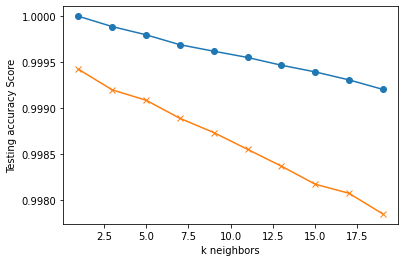

In [15]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_new)
    train_score = knn.score(X_train_scaled, y_train_new)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train_new)
print('k=1 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=1 Test Acc: 0.999


In [17]:
from sklearn.metrics import classification_report
predictions = knn.predict(X_test_scaled)
predictions
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.86      0.76      0.80       111

    accuracy                           1.00     71202
   macro avg       0.93      0.88      0.90     71202
weighted avg       1.00      1.00      1.00     71202

